In [1]:
#import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
#!pip install seaborn
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
 
# Load the MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

X

/home/sidney/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


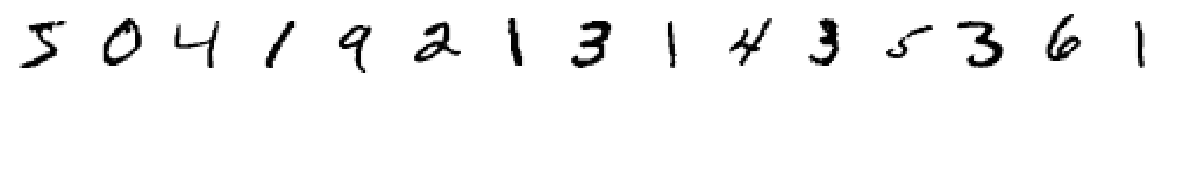

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=15, figsize=(15,2))
for i in range(15):
    axs[0,i].matshow(np.squeeze(X[i].reshape(28,28)), cmap=plt.cm.Greys)
    #axs[1,i].matshow((np.squeeze(X[i])), cmap=plt.cm.Greys)
    axs[0,i].axis('off')
    axs[1,i].axis('off')

In [5]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [6]:
X = X[:2000]

In [7]:
RS=20150101
nDim=2
tSNE = TSNE( n_components=nDim, random_state=RS ).fit_transform(X)

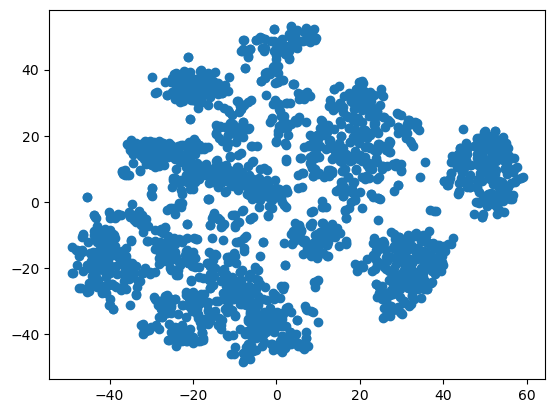

In [8]:
plt.scatter(tSNE[:,0],tSNE[:,1])

## k-Mean

In [9]:
kmeans_kwargs = {'init':'random', 'n_init':10, 'max_iter':2000, \
                    'random_state': RS }

In [10]:
kmeans = KMeans( n_clusters=10, **kmeans_kwargs )
kmeans.fit( tSNE )
LABELs = kmeans.labels_
centroides = kmeans.cluster_centers_

In [11]:
LABELs.shape

(2000,)

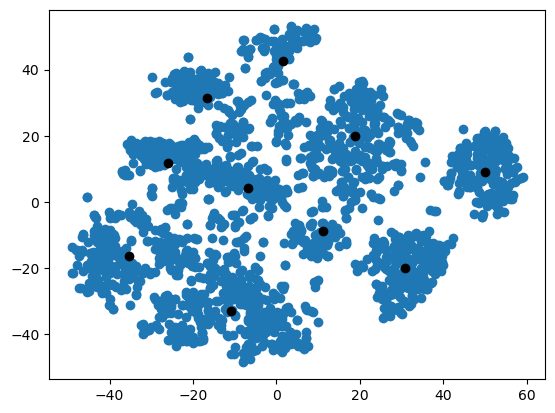

In [12]:
plt.scatter(tSNE[:,0],tSNE[:,1])
plt.scatter(centroides[:,0],centroides[:,1],color='black')

In [13]:
LABELs = LABELs.reshape(-1,1)
x = np.hstack([tSNE,LABELs])
print(x.shape)
x[0]

(2000, 3)


array([10.29068851, 13.4733448 ,  1.        ])

In [14]:
cmap = np.array(["red","orange","blue","black","yellow","brown","pink","gray","cyan","magenta"])

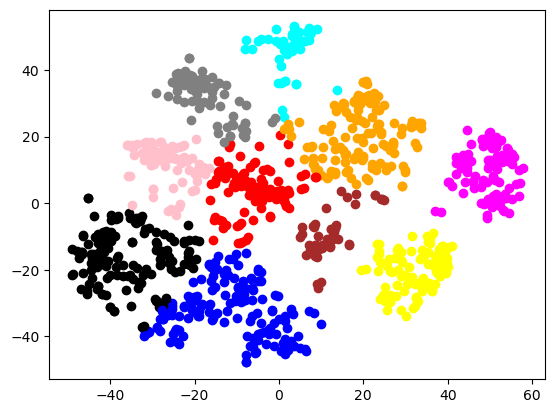

In [15]:
for i in range(1000):
    k = int(x[i][2])
    plt.scatter(x[i][0],x[i][1],color = cmap[k])
   # plt.scatter(centroides[:,0],centroides[:,1],s=100)
#plt.legend()

In [16]:
y = y[:2000]
y.shape

(2000,)

In [17]:
tsne_result_df = pd.DataFrame({'tsne_1': tSNE[:,0], 'tsne_2': tSNE[:,1], 'label': y})

<Figure size 2500x1500 with 0 Axes>

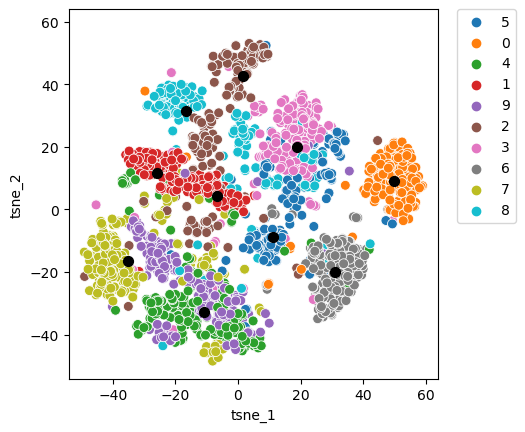

In [25]:
fig = plt.figure(figsize=(25,15))
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=50)
lim = (tSNE.min()-5, tSNE.max()+5)
plt.scatter(centroides[:,0],centroides[:,1],color='black',s=50)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)